### A STUDY ON COVID-19 CASES BY MUNICIPALITY IN THE NETHERLANDS ON THE REAL TIME RIVM.NL DATABASE (4/IV)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from lxml import html

In [18]:
RIVM_URL = "https://www.rivm.nl/coronavirus-kaart-van-nederland"
url = requests.get(RIVM_URL)
web = html.fromstring(url.content)
data = web.get_element_by_id("csvData").text

with open("dataset.csv", "w", encoding="utf-8") as f:
    f.write(data)

In [19]:
df=pd.read_csv("dataset.csv", sep=";", header=None, index_col=None)
df=df.drop(0)
df=df.drop(1)
headers=["Gemnr","Municipality","Case_Number","Population","1/100.000",]
df.columns=headers
df=df.drop(df.columns[0], axis=1)
df=df.drop(df.columns[3], axis=1)
#df=df.drop(df.columns[2], axis=1)

df.head()

,Municipality,Case_Number,Population
2,Aa en Hunze,1,25453
3,Aalsmeer,7,31857
4,Aalten,1,27117
5,Achtkarspelen,0,27836
6,Alblasserdam,5,20165


In [20]:
df.Municipality.count() # Municipality Number in the NL

354

In [21]:
df['Case_Number'] = pd.to_numeric(df['Case_Number'])
print(df.Case_Number.dtypes)

int64


In [22]:
df_sum=df.Case_Number.sum()
print(f'The total Case Number in the Netherlands is {df_sum}.')

The total Case Number in the Netherlands is 6456.


In [23]:
df_max = df.Case_Number.max()
df_max_mun=df.Municipality[df.Case_Number == df_max]
print(f"The municipality where the case number is the highest in the Netherlands is {df_max_mun.to_string(header=False, index=False)}")
print(f"The case number in {df_max_mun.to_string(header=False, index=False)} is {str(df_max)}.")

The municipality where the case number is the highest in the Netherlands is  Amsterdam
The case number in  Amsterdam is 306.


In [24]:
df_maxs=df.sort_values(ascending=False, by='Case_Number').head(20) #The municipalities where the case number is the highest in the NL.
df_maxs

,Municipality,Case_Number,Population
17,Amsterdam,306,872779
253,Rotterdam,172,651376
189,Meierijstad,142,81197
286,Tilburg,139,219800
51,Breda,126,184271
256,s-Gravenhage,121,545163
235,Peel en Maas,117,43420
295,Utrecht,111,357694
229,Oss,96,91932
186,Maastricht,93,121558


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

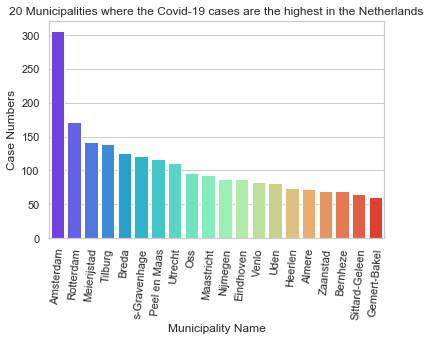

In [25]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x=df_maxs.Municipality, y=df_maxs.Case_Number, data=df_maxs, palette='rainbow')
ax.set(xlabel='Municipality Name', ylabel='Case Numbers', title='20 Municipalities where the Covid-19 cases are the highest in the Netherlands')
plt.xticks(rotation=85)

In [26]:
df.sort_values(by='Case_Number').head(30) #The municipalities where the case number is the lowest in the NL.

,Municipality,Case_Number,Population
281,Terschelling,0,4889
272,Stadskanaal,0,31688
14,Ameland,0,3718
209,Noord-Beveland,0,7395
309,Vlieland,0,1152
181,Loppersum,0,9533
258,Scherpenzeel,0,9880
5,Achtkarspelen,0,27836
260,Schiermonnikoog,0,947
254,Rozendaal,1,1705


In [27]:
df['Population'] = pd.to_numeric(df['Population'])

In [28]:
df.sort_values(by='Population', ascending=False).head(30)

,Municipality,Case_Number,Population
17,Amsterdam,306,872779
253,Rotterdam,172,651376
256,s-Gravenhage,121,545163
295,Utrecht,111,357694
93,Eindhoven,87,234456
113,Groningen,13,232922
286,Tilburg,139,219800
10,Almere,72,211840
51,Breda,126,184271
206,Nijmegen,88,177698


In [ ]:
def matching():
    
    while True:    
        
        Den_Bosch_other="'s-Hertogenbosch" 
        Den_Bosch="Den Bosch"
        
        Den_Haag_other="'s-Gravenhage"
        Den_Haag="Den Haag"
    
        input_loc=input("Pls, Write your municipality?   ")  
        
        if input_loc == Den_Bosch:
            search=df.Case_Number[df.Municipality==str(Den_Bosch_other)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")
                
        elif input_loc == Den_Haag:
        
            search=df.Case_Number[df.Municipality==str(Den_Haag_other)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")

        else:
            search=df.Case_Number[df.Municipality==str(input_loc)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")
            matching()
        
matching()